Ads Click-Through Rate (CTR) prediction is a crucial for  digital advertising. By accurately predicting CTR, advertisers can optimize their campaigns, enhance return on investment (ROI), and allocate resources more effectively.This project aims to use Machine Learning algorithms, ANNs for improving CTR predictions, ultimately driving more successful advertising strategies.

In [15]:
#import libraries
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Create a custom template with a light gray background
custom_template = {
    "layout": {
        "paper_bgcolor": "lightgray",
        "plot_bgcolor": "lightgray",
    }
}

# Set the default template to the custom template
pio.templates["custom_template"] = custom_template
pio.templates.default = "custom_template"


In [16]:
# read dataframe
df=pd.read_csv("ad_10000records.csv")

In [17]:
# df head
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


<ipython-input-18-d23c1780ab4f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Clicked on Ad',data=df, palette='hls')


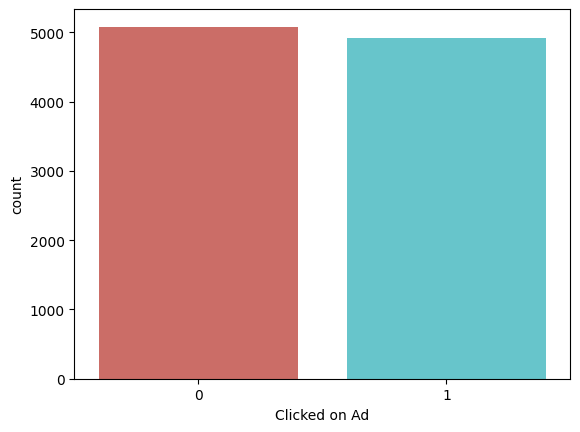

In [18]:
# check the count of clicked and not clicked
sns.countplot(x='Clicked on Ad',data=df, palette='hls')
plt.show();

In [19]:
#  total number of users who clicked on the ad
clicked_users = df[df['Clicked on Ad'] == 1]['Clicked on Ad'].count()

#  total number of users who left an impression on the ad
total_users = df['Clicked on Ad'].count()

# Calculate the overall Ads click-through rate
ctr = (clicked_users / total_users) * 100

print(f" Click-Through Rate: {ctr:.2f}%")


 Click-Through Rate: 49.17%


In [20]:
#dataframe dimensions
def display_shape(df):
    """Displays the shape of the DataFrame."""
    print("================== Shape ==================")
    print(df.shape[0],"rows,",df.shape[1],"columns", end="\n\n")
    print('=' * 45)
display_shape(df)

================== Shape ==================
10000 rows, 10 columns



In [21]:
# display columns
def display_columns(df):
    """Displays the columns of the DataFrame."""
    print("================== Columns =================")
    print(df.columns, end="\n\n")
    print('=' * 45)
display_columns(df)

================== Columns =================
Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')



In [23]:
# count null values
def display_null_values(df):
    """Displays the count of null values in each column."""
    print("================== Null values ==============")
    print(df.isnull().sum(), end="\n\n")
    print('=' * 45)
display_null_values(df)

================== Null values ==============
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64



In [24]:
#get numerical and categorical columns
def display_numerical_columns(df):
    """Displays the numerical columns in the DataFrame."""
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    print("================= Numerical Columns ==========")
    print(numerical_cols, end="\n\n")
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    print("================= Categorical Columns ==========")
    print(cat_cols, end="\n\n")

display_numerical_columns(df)

================= Numerical Columns ==========
Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad'],
      dtype='object')

================= Categorical Columns ==========
Index(['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp'], dtype='object')



In [25]:
# df info
def display_info(df):
    """Displays the DataFrame's info."""
    print("==================== Info ===================")
    print("\n")
    print(df.info(), end="\n\n")
    print('=' * 45)
display_info(df)

==================== Info ===================


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB
None



In [26]:
#describe df
def display_description(df):
    """Displays the descriptive statistics of the DataFrame."""
    print("==================== Description =============")
    print("\n")
    print(df.describe(), end="\n\n")
    print('=' * 45)
display_description(df)

==================== Description =============


       Daily Time Spent on Site           Age   Area Income  \
count              10000.000000  10000.000000  10000.000000   
mean                  61.660757     35.940100  53840.047721   
std                   15.704142      8.572973  13343.708718   
min                   32.600000     19.000000  13996.500000   
25%                   48.860000     29.000000  44052.302500   
50%                   59.590000     35.000000  56180.930000   
75%                   76.580000     42.000000  61840.260000   
max                   90.970000     60.000000  79332.330000   

       Daily Internet Usage  Clicked on Ad  
count          10000.000000   10000.000000  
mean             177.759831       0.491700  
std               40.820951       0.499956  
min              105.220000       0.000000  
25%              140.150000       0.000000  
50%              178.920000       0.000000  
75%              212.670000       1.000000  
max              269.96

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_box_plot(data, x_col, color_col, title, color_map=None):
    """
    Generates and visualizes a box plot with Seaborn and Matplotlib.

    Parameters:
        data (pd.DataFrame): The DataFrame that holds the data.
        x_col (str): The column name to be plotted along the x-axis.
        color_col (str): The column name used for color differentiation.
        title (str): The title for the plot.
        color_map (dict, optional): An optional dictionary that maps specific values to colors.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))

    # Set color palette based on color_map
    if color_map is not None:
        palette = {key: color_map[key] for key in data[color_col].unique() if key in color_map}
    else:
        palette = None

    # Create box plot
    sns.boxplot(x=x_col, hue=color_col, data=data, palette=palette)

    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel('Values')

    # Show the legend and plot
    plt.legend(title=color_col)
    plt.show()


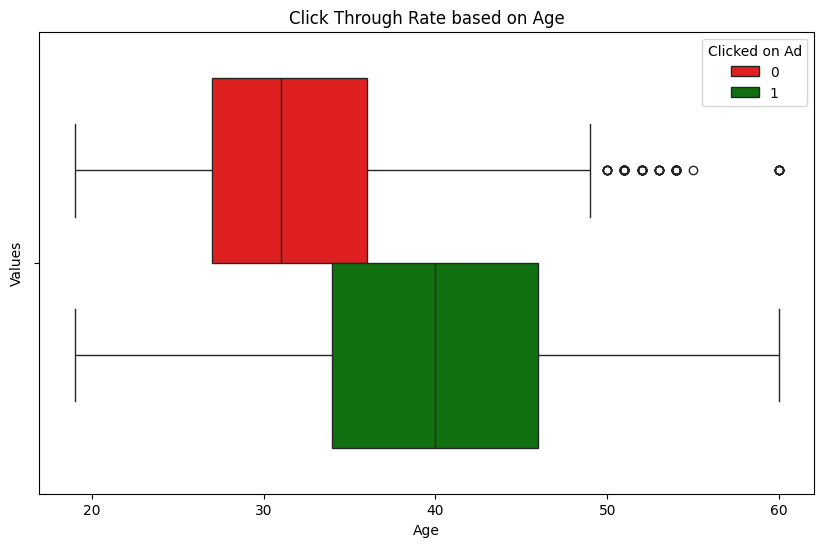

In [29]:
# Box plot - Click Through Rate based on Age
create_box_plot(df, "Age", "Clicked on Ad", "Click Through Rate based on Age", {1: 'green', 0: 'red'})

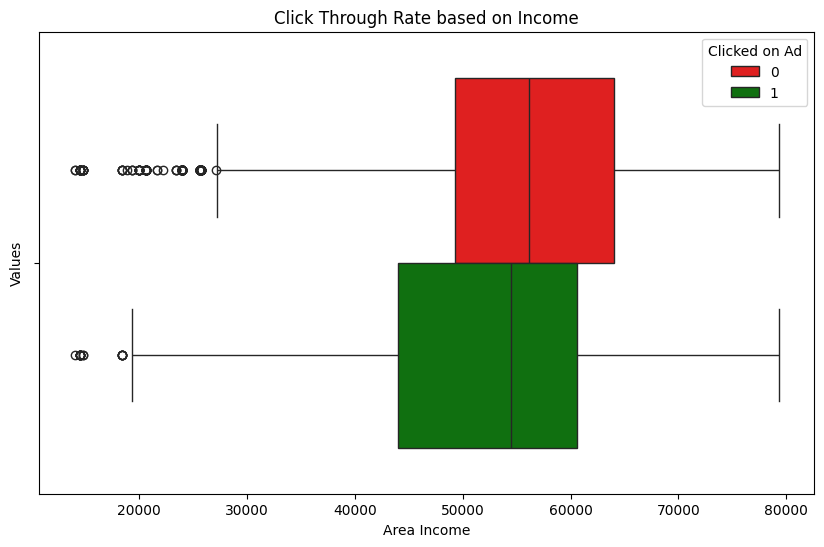

In [30]:
# Box plot -Click Through Rate based on Income
create_box_plot(df, "Area Income", "Clicked on Ad", "Click Through Rate based on Income", {1: 'green', 0: 'red'})

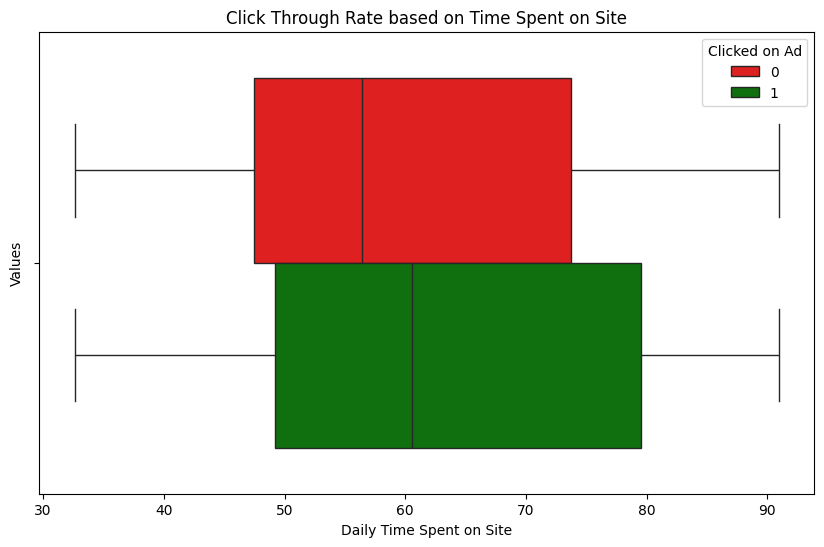

In [31]:
#Box plot- Click Through Rate based on Time Spent on Site
create_box_plot(df, "Daily Time Spent on Site", "Clicked on Ad", "Click Through Rate based on Time Spent on Site",  {1: 'green', 0: 'red'})

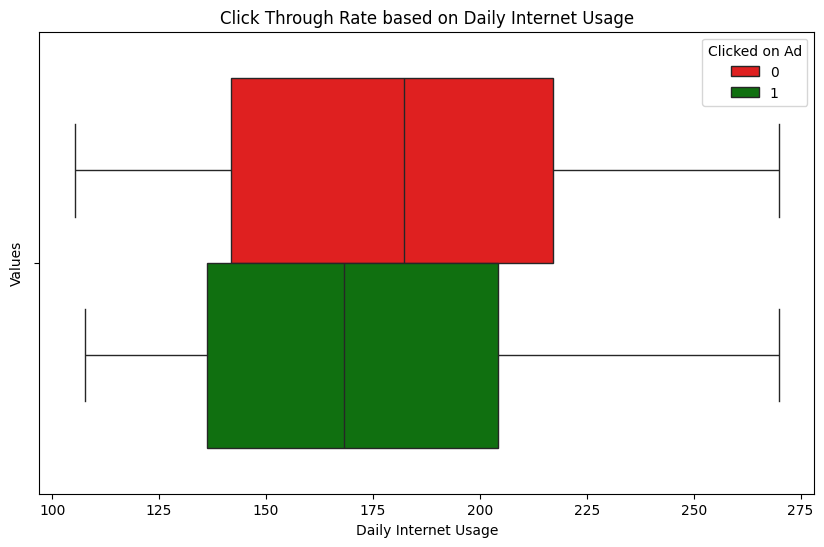

In [32]:
# Box plot- Click Through Rate based on Daily Internet Usage
create_box_plot(df, "Daily Internet Usage", "Clicked on Ad", "Click Through Rate based on Daily Internet Usage", {1: 'green', 0: 'red'})

In [33]:
df["Gender"] = df["Gender"].map({"Male": 1,
                               "Female": 0})

x=df.iloc[:,0:7]
#drop columns that may not contribute
x=x.drop(['Ad Topic Line','City'],axis=1)
y=df.iloc[:,9]

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,
                                           test_size=0.2,
                                           random_state=4)

In [35]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from xgboost import XGBClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)  # Calculate AUC

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Classification Report:")
    print(report)

# Logistic Regression with different configurations
log_reg_models = {
    'Logistic Regression (L2 Regularization)': LogisticRegression(),
    'Logistic Regression (L1 Regularization)': LogisticRegression(penalty='l1', solver='liblinear'),
    'Logistic Regression (ElasticNet)': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
}

# Evaluate each logistic regression model
for name, model in log_reg_models.items():
    print(f"Evaluating {name}...")
    evaluate_model(model, xtrain, xtest, ytrain, ytest)

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
print("Evaluating XGBoost Classifier...")
evaluate_model(xgb_model, X_train, X_test, y_train, y_test)


Evaluating Logistic Regression (L2 Regularization)...
Model: LogisticRegression
Accuracy: 0.7150
AUC: 0.7703
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1049
           1       0.70      0.69      0.70       951

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000

Evaluating Logistic Regression (L1 Regularization)...
Model: LogisticRegression
Accuracy: 0.7160
AUC: 0.7703
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1049
           1       0.70      0.69      0.70       951

    accuracy                           0.72      2000
   macro avg       0.72      0.71      0.72      2000
weighted avg       0.72      0.72      0.72      2000

Evaluating Logistic Regression (ElasticNet)...
Model: LogisticRegression
Accuracy:

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:13:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - AUC: 0.6661 - loss: 0.6351 - val_AUC: 0.7786 - val_loss: 0.5600
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7802 - loss: 0.5600 - val_AUC: 0.7821 - val_loss: 0.5568
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7818 - loss: 0.5603 - val_AUC: 0.7826 - val_loss: 0.5570
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7890 - loss: 0.5529 - val_AUC: 0.7860 - val_loss: 0.5533
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7957 - loss: 0.5471 - val_AUC: 0.7851 - val_loss: 0.5574
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7795 - loss: 0.5607 - val_AUC: 0.7865 - val_loss: 0.5515
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7881 - loss: 0.5549 - val_AUC: 0.7881 - val_loss: 0.5508
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7997 - loss: 0.5415 - val_AUC: 0.7872 - val_loss: 0.5532
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

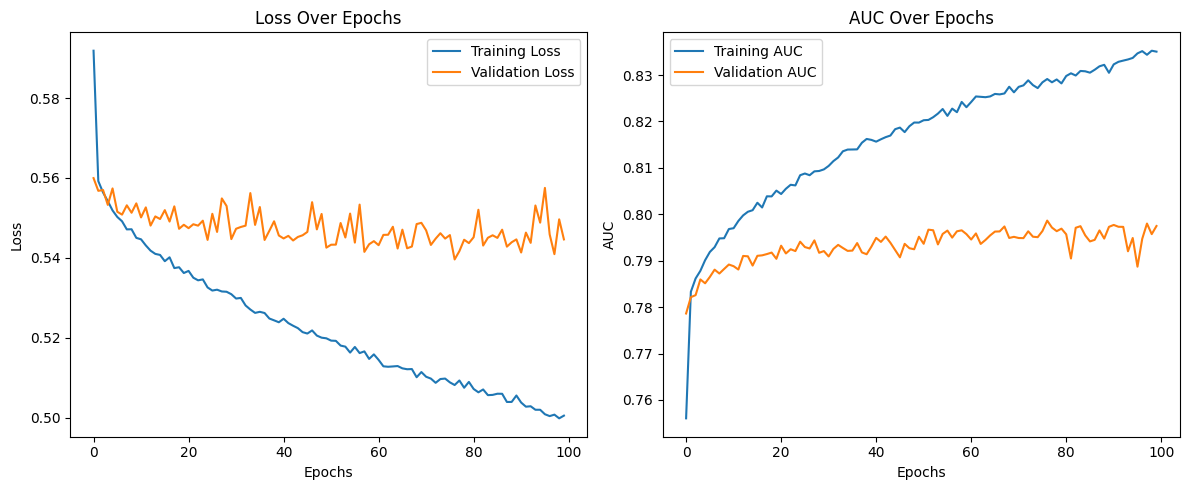

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

# Function to create a neural network model
def create_nn_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),  # Use Input layer
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

# Create the neural network model
nn_model = create_nn_model((X_train_scaled.shape[1],))

# Train the model and store history
history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model
y_pred_proba = nn_model.predict(X_test_scaled)
y_pred_classes = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Plotting the training history
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plotting AUC
plt.subplot(1, 2, 2)
plt.plot(history.history['AUC'], label='Training AUC')
plt.plot(history.history['val_AUC'], label='Validation AUC')
plt.title('AUC Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.7345 - loss: 0.6528 - val_AUC: 0.7725 - val_loss: 0.6112
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7674 - loss: 0.6187 - val_AUC: 0.7692 - val_loss: 0.6006
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7661 - loss: 0.6104 - val_AUC: 0.7753 - val_loss: 0.5931
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7889 - loss: 0.5879 - val_AUC: 0.7768 - val_loss: 0.5863
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7869 - loss: 0.5792 - val_AUC: 0.7797 - val_loss: 0.5822
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7916 - loss: 0.5735 - val_AUC: 0.7822 - val_loss: 0.5742
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7893 - loss: 0.5695 - val_AUC: 0.7831 - val_loss: 0.5717
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8006 - loss: 0.5565 - val_AUC: 0.7858 - val_loss: 0.5674
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

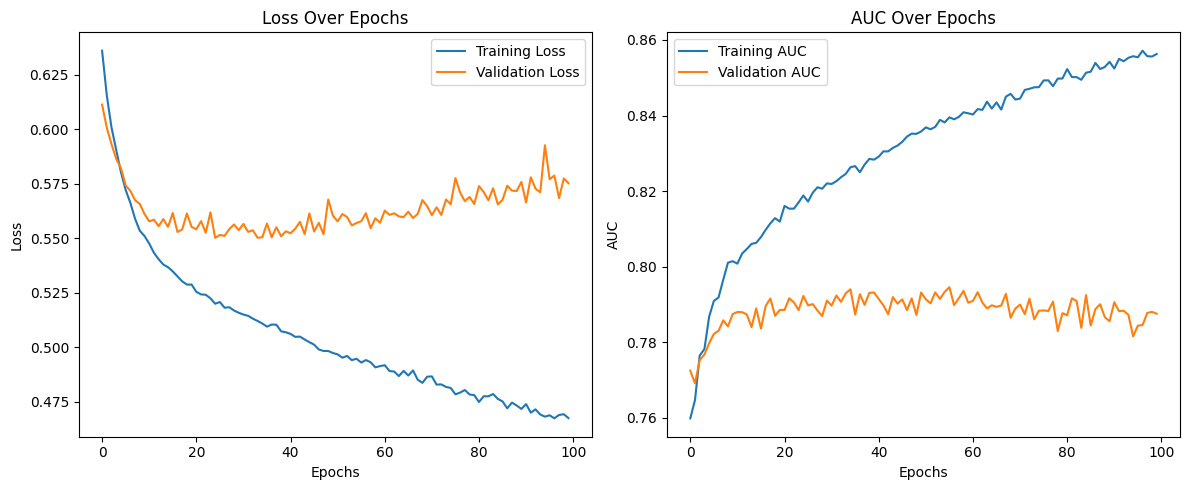

In [40]:
#Trying with another configuration


# Function to create a neural network model
def create_nn_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),  # Use Input layer
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

# Create the neural network model
nn_model = create_nn_model((X_train_scaled.shape[1],))

# Train the model and store history
history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model
y_pred_proba = nn_model.predict(X_test_scaled)
y_pred_classes = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Plotting the training history
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plotting AUC
plt.subplot(1, 2, 2)
plt.plot(history.history['AUC'], label='Training AUC')
plt.plot(history.history['val_AUC'], label='Validation AUC')
plt.title('AUC Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

Recommendations:

1. Age and Ad Interaction: Our findings suggest that older users tend to click on ads more frequently. This insight highlights a potentially lucrative market segment for advertisers. We encourage advertisers to consider this demographic when optimizing their campaigns.

2. Income and Ad Engagement: Additionally, we have observed that individuals from higher-income areas exhibit lower ad click rates. It may be beneficial for advertisers to revisit their targeting strategies within these segments.

3. Ad Engagement and Time Spent: Our analysis indicates that users who spend more time on the website tend to click on ads more frequently. This suggests a positive correlation between time spent on the site and ad engagement. We recommend considering targeted ad campaigns aimed at these engaged users to potentially enhance click-through rates.

4. Internet Usage and Clicks: It appears that users with high daily internet usage are less likely to click on ads compared to those with lower usage. Focusing ad efforts on users with lower internet usage may prove to be more effective in terms of click-through rates.


Performance:

XGBoost Classifier performed well better followed by  Neural Network.